In [ ]:
!pip install datasets

**<h2>Importing All the Necessary Libraries</h2>**

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**<h3>Filtering for Data Analysts in India</h3>**

In [3]:
df_da_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]


In [4]:
df_da_india.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
197,Data Analyst,Data Analyst (dbt & Looker),Anywhere,via LinkedIn,Full-time,True,India,2023-12-06 13:08:41,False,False,India,None,NaN,NaN,Catchpoint,"[sql, python, java, scala, snowflake, aws, azu...","{'analyst_tools': ['looker'], 'cloud': ['snowf..."
268,Data Analyst,Database Marketing Campaign Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-08-24 13:29:25,False,False,India,None,NaN,NaN,NeerInfo Solutions,"[sql, oracle, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
359,Data Analyst,Data Analyst ( 4 -5 yrs),"Chennai, Tamil Nadu, India",via LinkedIn,Contractor,False,India,2023-06-30 13:15:25,True,False,India,None,NaN,NaN,Intelltech Zoom Pvt Ltd,[sql],{'programming': ['sql']}
504,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-11-12 13:08:06,True,False,India,None,NaN,NaN,HSBC,"[sql, nosql, python, r, mysql, sql server, pos...","{'analyst_tools': ['qlik', 'tableau', 'power b..."
691,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-09-12 13:14:38,True,False,India,None,NaN,NaN,AOS,None,None


**<h3>Plotting Graph for Jobs Availability in various parts of India(Top 10)</h3>**

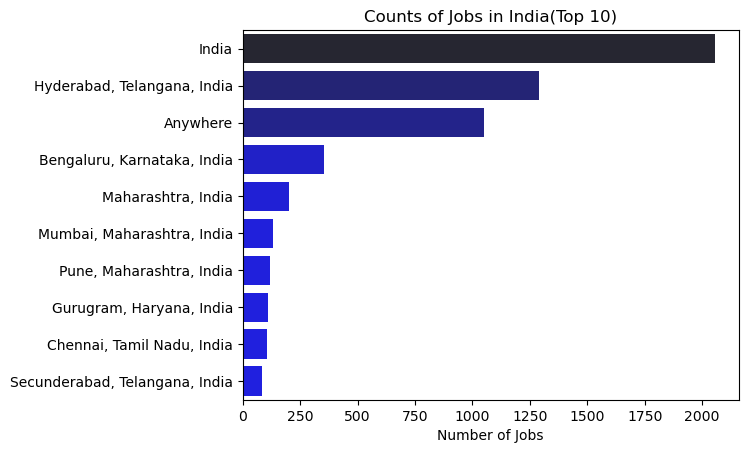

In [5]:
df_plotting = df_da_india['job_location'].value_counts().head(10).to_frame()
sns.barplot(data = df_plotting , x ='count' , y ='job_location', hue='count' ,palette='dark:b_r',legend =False)
plt.title("Counts of Jobs in India(Top 10)")
sns.despine
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

**<h3>Number of jobs provided by Companies(Top 10)</h3>**

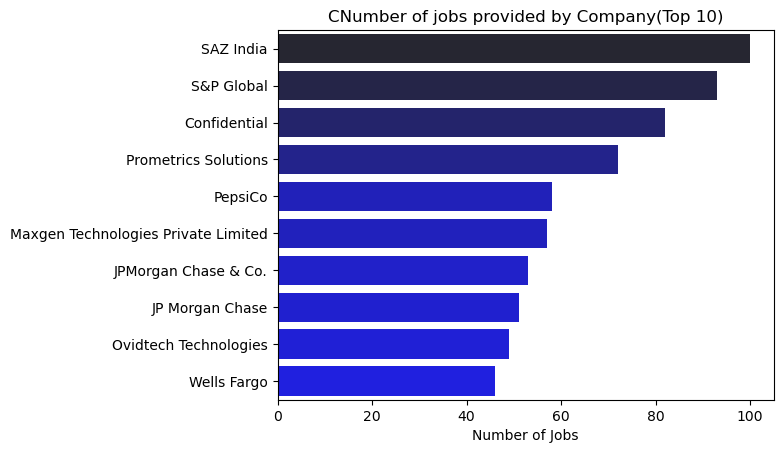

In [6]:
df_plotting = df_da_india['company_name'].value_counts().head(10).to_frame()
sns.barplot(data = df_plotting , x ='count' , y ='company_name', hue='count' ,palette='dark:b_r',legend =False)
plt.title("Number of jobs provided by Company(Top 10)")
sns.despine
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()